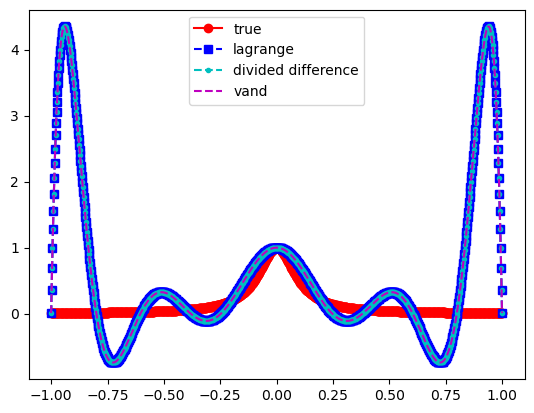

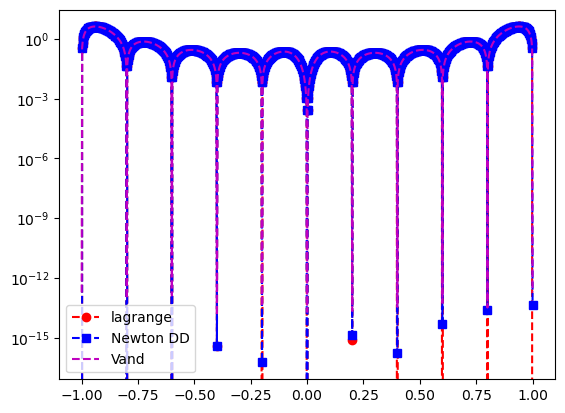

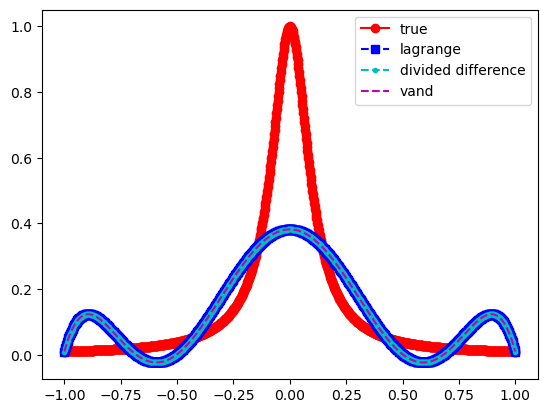

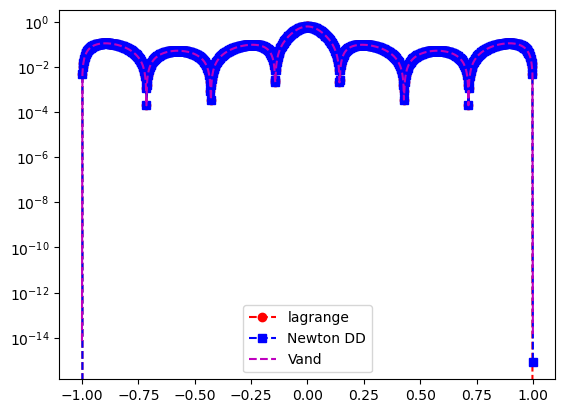

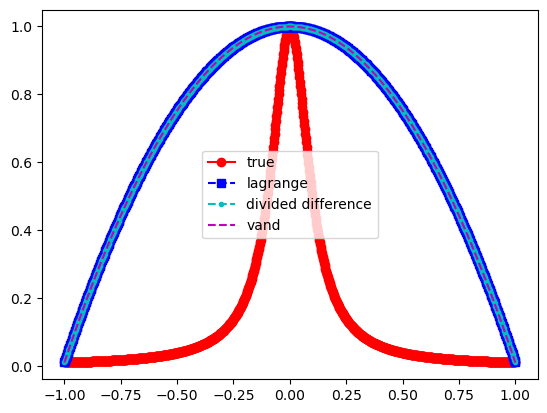

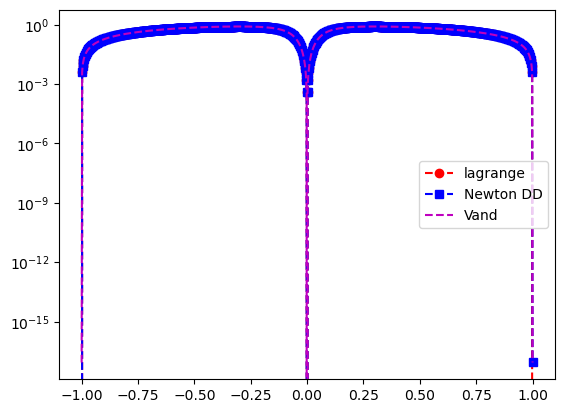

(None, None, None)

In [76]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from numpy.linalg import inv
import math

def driver(N):


    f = lambda x: 1/(1 + (10*x)**2)

    #N = 10
    ''' interval'''
    a = -1
    b = 1
   

    ''' create equispaced interpolation nodes'''
    xint = np.linspace(a,b,N+1)
    
    ''' create interpolation data'''
    yint = f(xint)
    
    '''initialize Vandermode matrix''' 
    v = np.zeros((N+1,N+1))
    
    coefs = Vandermonde(xint, yint, v, N+1)
    
    
    
    ''' create points for evaluating the Lagrange interpolating polynomial'''
    Neval = 1000
    xeval = np.linspace(a,b,Neval+1)
    yeval_l= np.zeros(Neval+1)
    yeval_dd = np.zeros(Neval+1)
    yeval_vand = np.zeros(Neval+1)
  
    '''Initialize and populate the first columns of the 
     divided difference matrix. We will pass the x vector'''
    y = np.zeros( (N+1, N+1) )
     
    for j in range(N+1):
       y[j][0]  = yint[j]

    y = dividedDiffTable(xint, y, N+1)
    ''' evaluate lagrange poly '''
    for kk in range(Neval+1):
        yeval_l[kk] = eval_lagrange(xeval[kk],xint,yint,N)
        yeval_dd[kk] = evalDDpoly(xeval[kk],xint,y,N)
        yeval_vand[kk] = evalVand(xeval[kk],coefs,N+1)

    


    ''' create vector with exact values'''
    fex = f(xeval)
       

    plt.figure()    
    plt.plot(xeval,fex,'ro-', label = "true")
    plt.plot(xeval,yeval_l,'bs--',  label = "lagrange") 
    plt.plot(xeval,yeval_dd,'c.--',  label = "divided difference")
    plt.plot(xeval,yeval_vand,'m--',  label = "vand")
    plt.legend()

    plt.figure() 
    err_l = abs(yeval_l-fex)
    err_dd = abs(yeval_dd-fex)
    err_vand = abs(yeval_vand-fex)
    plt.semilogy(xeval,err_l,'ro--',label='lagrange')
    plt.semilogy(xeval,err_dd,'bs--',label='Newton DD')
    plt.semilogy(xeval,err_vand,'m--',label='Vand')
    plt.legend()
    plt.show()

def eval_lagrange(xeval,xint,yint,N):

    lj = np.ones(N+1)
    
    for count in range(N+1):
       for jj in range(N+1):
           if (jj != count):
              lj[count] = lj[count]*(xeval - xint[jj])/(xint[count]-xint[jj])

    yeval = 0.
    
    for jj in range(N+1):
       yeval = yeval + yint[jj]*lj[jj]
  
    return(yeval)
  
'''create Vandermode Matrix'''
'''solve for coefficients'''
def Vandermonde(x,y,v,n):
    for i in range(n):
        for j in range(n):
            v[j][i] = x[j]**i
    
    vinv = inv(v)
    coefs = np.matmul(vinv,np.transpose(y))
    return coefs

'''evaluate polynomial'''
def evalVand(xeval,coefs,n):
    yeval = 0.
    for i in range(n):
        yeval += coefs[i]*xeval**i
    return yeval
    

''' create divided difference matrix'''
def dividedDiffTable(x, y, n):
 
    for i in range(1, n):
        for j in range(n - i):
            y[j][i] = ((y[j][i - 1] - y[j + 1][i - 1]) /
                                     (x[j] - x[i + j]));
    return y;
    
def evalDDpoly(xval, xint,y,N):
    ''' evaluate the polynomial terms'''
    ptmp = np.zeros(N+1)
    
    ptmp[0] = 1.
    for j in range(N):
      ptmp[j+1] = ptmp[j]*(xval-xint[j])
     
    '''evaluate the divided difference polynomial'''
    yeval = 0.
    for j in range(N+1):
       yeval = yeval + y[0][j]*ptmp[j]  

    return yeval

       

driver(10), driver(7), driver(2)       


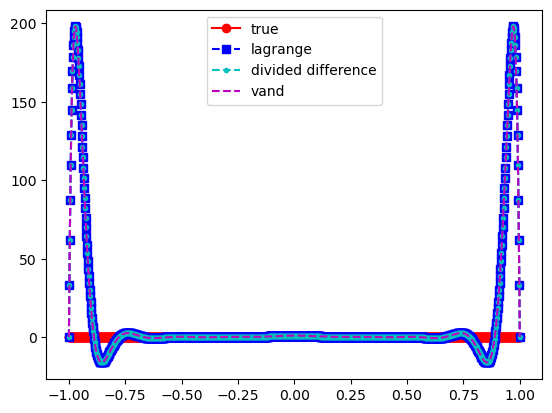

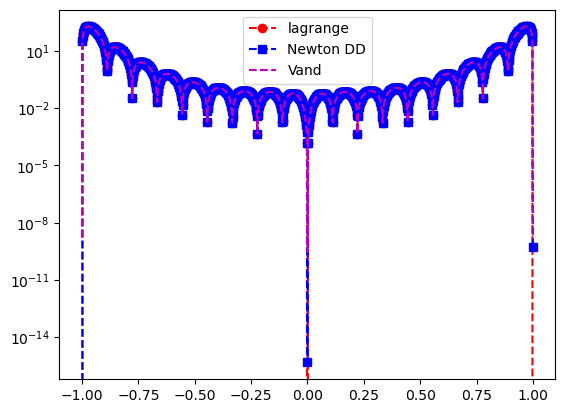

In [64]:
driver(18)

### 3.1.2
The Lagrange method performs the best with the smallest error compared to the other two methods at the nodes. They all produce the same polynomial but this makes sense because the polynomial from interpolation is unique. Newton's divided differences is the second best and again as expected the Vandermonde method is the worst because it has the most arithemtic operations which can lead to digit loss. Also, if the node points are too close together, the computer can think rows of the matrix are linearly dependent and thus that the matrix is singular. These different ways of computing the polynomial are what lead to the differences in error: lagrange and newton's dd don't require matrix inversion, for one. 

### 3.1.2
The interpolation polynomial is matching the true function value with even more accuracy. The error towards the middle of the function is relatively small, and the error at each of the nodes are very small with Lagrange still possessing the smallest error, though by not as much. The error is by far the largest at the endpoints of the interval, but this is what is expected due to the Runge phenomena

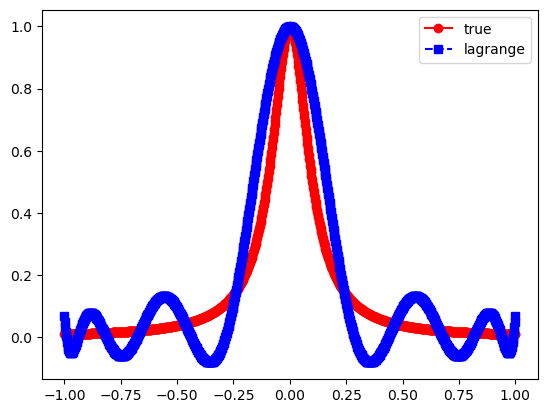

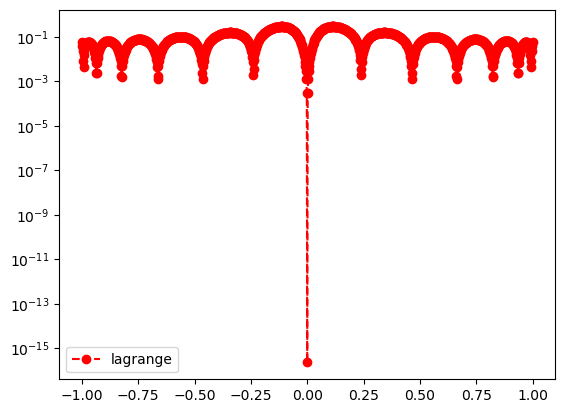

In [71]:
def driver():


    f = lambda x: 1/(1 + (10*x)**2)

    N = 13
    ''' interval'''
    a = -1
    b = 1
   

    ''' create equispaced interpolation nodes'''
    xint = np.empty(N+1)
    for i in range(1,N+1):
        xint[i-1] = math.cos(((2*i - 1)*np.pi)/(2*N))
        
    ''' create interpolation data'''
    yint = f(xint)
    
    '''initialize Vandermode matrix''' 
    #v = np.zeros((N+1,N+1))
  #  for j in range(N+1):
   #     v[j][0] = xint[j]
    
    #coefs = Vandermonde(xint, yint, v, N+1)
    
    
    
    ''' create points for evaluating the Lagrange interpolating polynomial'''
    Neval = 1000
    xeval = np.linspace(a,b,Neval+1)
    yeval_l= np.zeros(Neval+1)
   # yeval_dd = np.zeros(Neval+1)
   # yeval_vand = np.zeros(Neval+1)
  
    '''Initialize and populate the first columns of the 
     divided difference matrix. We will pass the x vector'''
    #y = np.zeros( (N+1, N+1) )
     
    

    #y = dividedDiffTable(xint, y, N+1)
    ''' evaluate lagrange poly '''
    for kk in range(Neval+1):
        yeval_l[kk] = eval_lagrange(xeval[kk],xint,yint,N)
        #yeval_dd[kk] = evalDDpoly(xeval[kk],xint,y,N)
       # yeval_vand[kk] = evalVand(xeval[kk],coefs,N+1)

    


    ''' create vector with exact values'''
    fex = f(xeval)
       

    plt.figure()    
    plt.plot(xeval,fex,'ro-', label = "true")
    plt.plot(xeval,yeval_l,'bs--',  label = "lagrange") 
    #plt.plot(xeval,yeval_dd,'c.--',  label = "divided difference")
    #plt.plot(xeval,yeval_vand,'m--',  label = "vand")
    plt.legend()

    plt.figure() 
    err_l = abs(yeval_l-fex)
    #err_dd = abs(yeval_dd-fex)
    #err_vand = abs(yeval_vand-fex)
    plt.semilogy(xeval,err_l,'ro--',label='lagrange')
    #plt.semilogy(xeval,err_dd,'bs--',label='Newton DD')
    #plt.semilogy(xeval,err_vand,'m--',label='Vand')
    plt.legend()
    plt.show()
    
driver()

### 3.2.2
The interpolation polynomial now more consistently matches the true value of the function across the whole interval